# üìò Land Use Classification Project

## üî∂ Project Overview
This project focuses on building a machine learning model for land use classification based on images. The model will predict multiple land use categories associated with a given image. This involves data preprocessing, model training, and evaluation of the model's performance.

---

## üî∑ Dataset Description
- **Dataset Name:** `train_v2.csv`
- **Content:** The dataset contains images and their corresponding tags that indicate the land use type. Each image may have multiple associated tags.

---

## üî∂ Step-by-Step Breakdown

### üìå 1. Load the Dataset
- Utilize the `pandas` library to read the CSV file containing image data and associated tags.
- **Why?** Loading the dataset is the first step to analyze and manipulate the data for further processing.

### üìå 2. Inspect the Dataset
- Display the first few rows, check the shape, and gather general information about the dataset.
- Identify any missing values and generate summary statistics.
- **Why?** Inspecting the dataset helps to understand its structure and identify any preprocessing steps needed.

### üìå 3. Check Unique Values in Tags
- Determine the number of unique tags present in the dataset.
- **Why?** Understanding the number of unique labels is essential for designing the model and preparing the output layer.

### üìå 4. Visualize the Distribution of Tags
- Create a bar plot to visualize the frequency of the number of tags per image.
- **Why?** Visualizing the distribution helps in understanding how many images have multiple tags, indicating the complexity of the classification task.

### üìå 5. Visualize Missing Values
- Use a heatmap to represent missing values in the dataset visually.
- **Why?** This visualization aids in identifying patterns of missing data, which can be crucial for deciding how to handle them.

### üìå 6. Count Each Tag
- Count occurrences of each tag across the dataset and visualize the top 20 most frequent tags with a bar plot.
- **Why?** Understanding the most common tags helps prioritize model focus and identify any potential class imbalances.

### üìå 7. Correlation Matrix
- Generate a correlation matrix to explore relationships between features (dummy features in this case).
- **Why?** This analysis helps to understand how features interact with each other, which can influence model selection and design.

### üìå 8. Distribution of Random Features
- Plot the distribution of randomly generated features for demonstration purposes.
- **Why?** This step serves as an illustration of how feature distributions can be visualized and analyzed.

### üìå 9. Preprocess the Tags
- Convert the list of tags into a suitable format for multi-label classification.
- **Why?** Proper formatting of tags is necessary to enable the model to learn from them effectively.

### üìå 10. Convert Tags to Numerical Representation
- Use `MultiLabelBinarizer` to transform the tags into a binary matrix for model training.
- **Why?** Machine learning models work with numerical data, so converting categorical labels into a binary format is crucial.

### üìå 11. Split the Dataset
- Split the dataset into training and validation sets to evaluate model performance effectively.
- **Why?** Having separate training and validation datasets is essential for unbiased evaluation of the model's performance.

### üìå 12. Build the Model
- Create a neural network model using `Sequential` from TensorFlow, adding layers like Dense and Dropout for regularization.
- **Why?** The model architecture is key to capturing the complexity of the classification task, and regularization helps prevent overfitting.

### üìå 13. Compile the Model
- Compile the model with appropriate loss functions and optimizers, specifically for multi-label classification.
- **Why?** Compiling the model sets the training configurations, including how to measure performance during training.

### üìå 14. Train the Model
- Fit the model to the training data and monitor validation loss to avoid overfitting using the EarlyStopping callback.
- **Why?** Training the model is the core part of machine learning; monitoring validation loss helps ensure the model generalizes well.

### üìå 15. Evaluate the Model
- Evaluate model performance on the validation set and print out loss and accuracy metrics.
- **Why?** Evaluating the model provides insights into how well it performs on unseen data, which is critical for its practical application.

### üìå 16. Plot Loss and Validation Loss
- Visualize the training and validation loss over epochs to assess model training.
- **Why?** This plot helps to diagnose training issues and determine if the model is overfitting or underfitting.

### üìå 17. Model Deployment
- Implement a function to predict land use for a given image name based on the trained model.
- **Why?** This step is essential for utilizing the trained model in real-world applications to make predictions on new data.

---

## üî∂ Key Outputs
- **Visualizations:** Various plots saved as PDFs, including:
  - Distribution of Tags
  - Missing Values Heatmap
  - Top 20 Most Frequent Tags
  - Correlation Matrix
  - Distribution of Random Features
  - Training and Validation Loss

- **CSV Files:** Outputs saved for:
  - Missing values
  - Basic statistics of the dataset

---

## üî∑ Conclusion
This project demonstrates the complete workflow of building a machine learning model for multi-label classification tasks, emphasizing data preprocessing, model training, and evaluation. The visualizations provide insights into the data distribution and model performance.

---

## üî∂ References
- TensorFlow documentation for model building and training techniques.
- Pandas documentation for data manipulation and analysis.
- Seaborn and Matplotlib documentation for visualization techniques.

In [11]:
!pip install tensorflow keras pandas scikit-learn  # Install necessary libraries: TensorFlow, Keras, Pandas, and Scikit-learn for deep learning and data manipulation


In [12]:
!pip install --upgrade keras  # Upgrade Keras to the latest version

In [13]:
import warnings  # Import the warnings module to manage warning messages

In [14]:
warnings.filterwarnings('ignore')  # Suppress warnings to keep the output clean

In [15]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis

In [16]:
import numpy as np  # Importing the numpy library for numerical operations

In [17]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs

In [18]:
import seaborn as sns  # Importing Seaborn for enhanced visualizations

In [19]:
import tensorflow as tf  # Importing TensorFlow for building and training neural networks

In [20]:
from sklearn.model_selection import train_test_split  # Importing function to split dataset into training and validation sets


In [21]:
from sklearn.preprocessing import MultiLabelBinarizer  # Importing MultiLabelBinarizer for multi-label classification


In [22]:
from tensorflow.keras.models import Sequential  # Importing Sequential model from Keras

In [23]:
from tensorflow.keras.layers import Dense, Dropout  # Importing Dense and Dropout layers for the model

In [24]:
from tensorflow.keras.callbacks import EarlyStopping  # Importing EarlyStopping callback for training

# üìå 1. Load the Dataset
- Utilize the `pandas` library to read the CSV file containing image data and associated tags.
- **Why?** Loading the dataset is the first step to analyze and manipulate the data for further processing.

In [25]:
#  Load the dataset

In [26]:
dataset_path = '/content/train_v2.csv'  # Path to the dataset

In [27]:
data = pd.read_csv(dataset_path)  # Loading the dataset into a pandas DataFrame

# üìå 2. Inspect the Dataset
- Display the first few rows, check the shape, and gather general information about the dataset.
- Identify any missing values and generate summary statistics.
- **Why?** Inspecting the dataset helps to understand its structure and identify any preprocessing steps needed.

In [28]:
# Inspect the Dataset

In [29]:
print("First few rows of the dataset:")  # Print statement for clarity
print(data.head())  # Display the first five rows of the dataset

First few rows of the dataset:
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


In [30]:
print("\nShape of the dataset:")  # Print statement for clarity
print(data.shape)  # Display the shape of the dataset


Shape of the dataset:
(40479, 2)


In [31]:
print("\nDataset Information:")  # Print statement for clarity
print(data.info())  # Display information about the dataset, including data types and non-null counts


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  40479 non-null  object
 1   tags        40479 non-null  object
dtypes: object(2)
memory usage: 632.6+ KB
None


In [32]:
missing_values = data.isnull().sum()  # Store the number of missing values in each column

In [33]:
print("\nMissing Values in each column:")  # Print statement for clarity
print(missing_values)  # Display missing values in each column


Missing Values in each column:
image_name    0
tags          0
dtype: int64


In [34]:
statistics = data.describe(include='all')  # Store basic statistics for all columns

In [35]:
print("\nBasic Statistics:")  # Print statement for clarity
print(statistics)  # Display basic statistics


Basic Statistics:
       image_name           tags
count       40479          40479
unique      40479            449
top       train_0  clear primary
freq            1          13636


In [36]:
# Save missing values and statistics to CSV

In [37]:
missing_values.to_csv('/content/missing_values.csv')  # Save missing values to CSV

In [38]:
statistics.to_csv('/content/statistics.csv')  # Save statistics to CSV

# üìå 3. Check Unique Values in Tags
- Determine the number of unique tags present in the dataset.
- **Why?** Understanding the number of unique labels is essential for designing the model and preparing the output layer.

In [39]:
#  Check Unique Values in Tags

In [40]:
unique_tags = data['tags'].unique()  # Get unique tags

In [41]:
print(f"\nNumber of unique tags: {len(unique_tags)}")  # Print the number of unique tags


Number of unique tags: 449


In [42]:
# EDAs

# üìå 4. Visualize the Distribution of Tags
- Create a bar plot to visualize the frequency of the number of tags per image.
- **Why?** Visualizing the distribution helps in understanding how many images have multiple tags, indicating the complexity of the classification task.

In [43]:
#  Visualize the Distribution of Tags

In [44]:
tag_counts = data['tags'].apply(lambda x: len(x)).value_counts()  # Count the number of tags per image

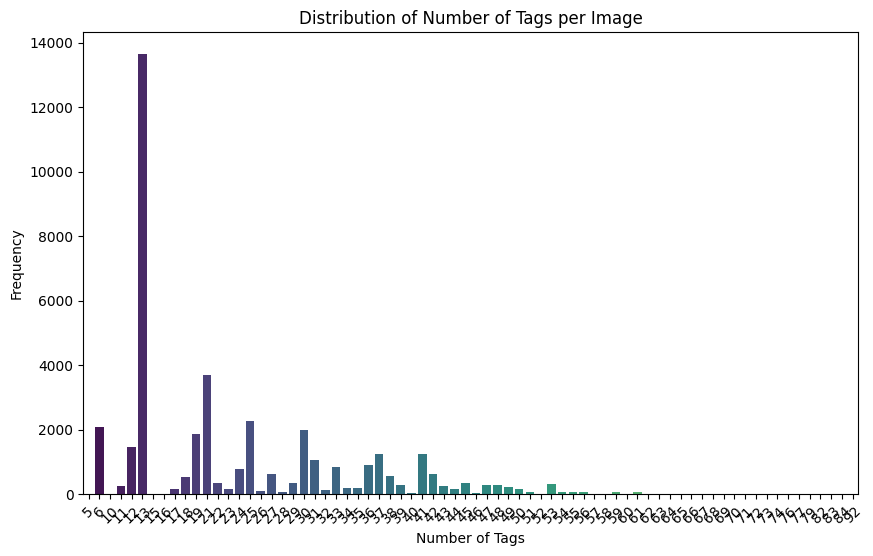

In [45]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette='viridis')  # Create a bar plot
plt.title('Distribution of Number of Tags per Image')  # Title of the plot
plt.xlabel('Number of Tags')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig('/content/distribution_of_tags.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

# üìå 5. Visualize Missing Values
- Use a heatmap to represent missing values in the dataset visually.
- **Why?** This visualization aids in identifying patterns of missing data, which can be crucial for deciding how to handle them.

In [46]:
#  Visualize Missing Values

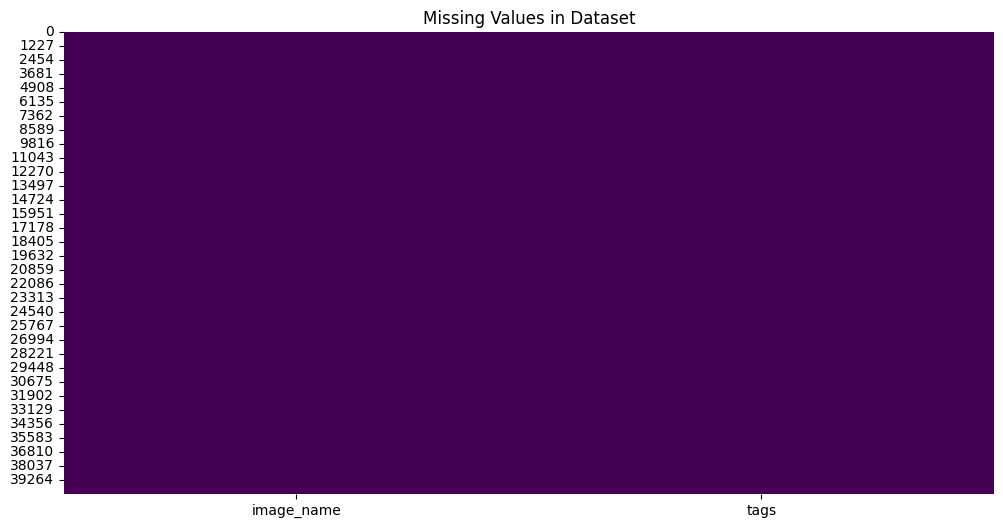

In [47]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')  # Create a heatmap for missing values
plt.title('Missing Values in Dataset')  # Title of the heatmap
plt.savefig('/content/missing_values_heatmap.pdf')  # Save the heatmap as a PDF
plt.show()  # Display the heatmap

# üìå 6. Count Each Tag
- Count occurrences of each tag across the dataset and visualize the top 20 most frequent tags with a bar plot.
- **Why?** Understanding the most common tags helps prioritize model focus and identify any potential class imbalances.

In [48]:
# Count Each Tag

In [49]:
tag_list = [tag for sublist in data['tags'].apply(lambda x: x.split()) for tag in sublist]  # Flatten the list of tags


In [50]:
tag_counts = pd.Series(tag_list).value_counts()  # Count occurrences of each tag

In [51]:
# Visualize the count of each tag

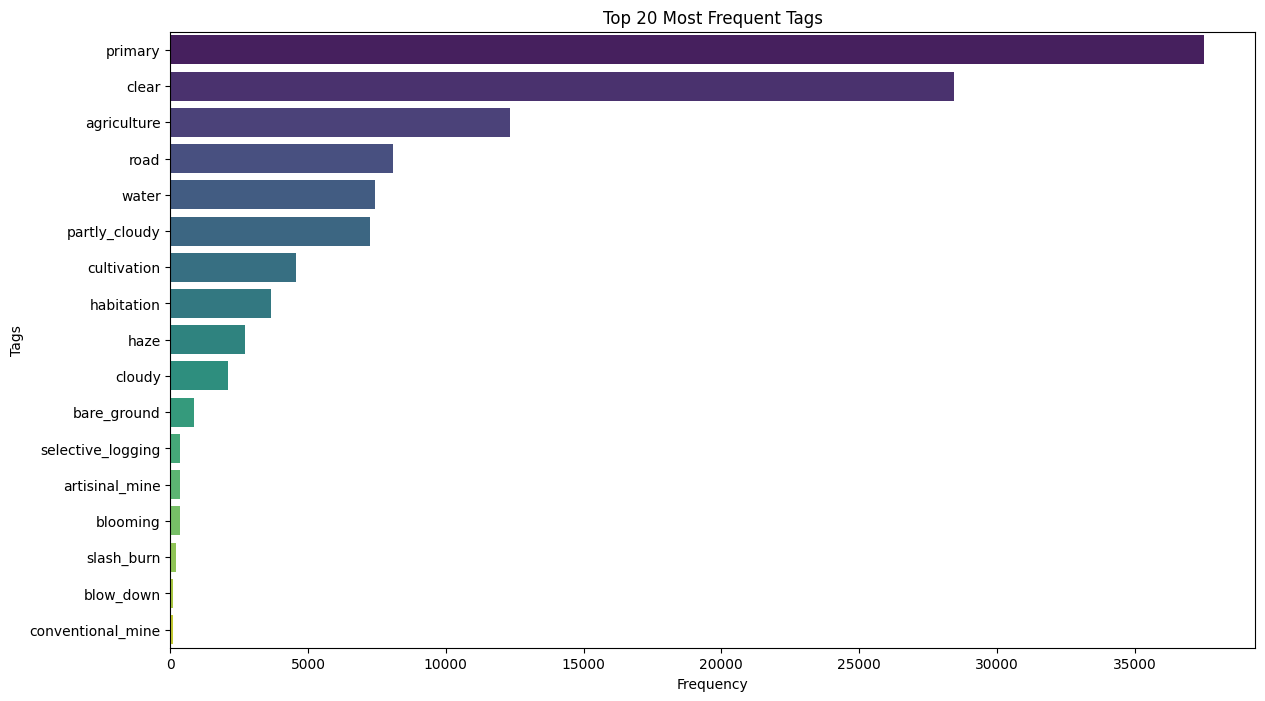

In [52]:
plt.figure(figsize=(14, 8))  # Set figure size
sns.barplot(x=tag_counts.values[:20], y=tag_counts.index[:20], palette='viridis')  # Bar plot for top 20 tags
plt.title('Top 20 Most Frequent Tags')  # Title of the plot
plt.xlabel('Frequency')  # X-axis label
plt.ylabel('Tags')  # Y-axis label
plt.savefig('/content/top_20_tags.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

# üìå 7. Correlation Matrix
- Generate a correlation matrix to explore relationships between features (dummy features in this case).
- **Why?** This analysis helps to understand how features interact with each other, which can influence model selection and design.

In [53]:
# Correlation Matrix

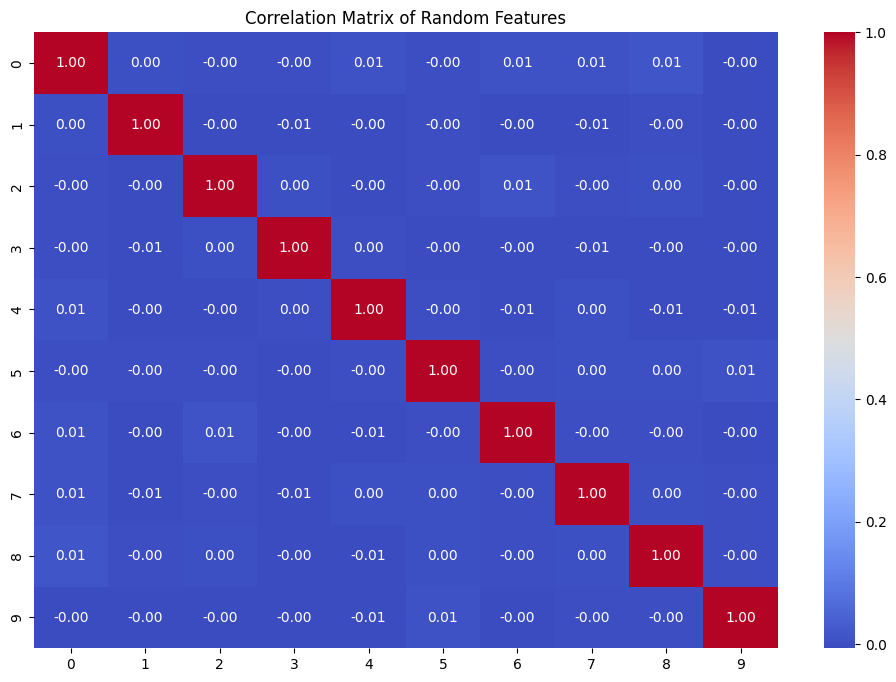

In [54]:
plt.figure(figsize=(12, 8))  # Set figure size
corr_matrix = np.corrcoef(np.random.rand(len(data), 10), rowvar=False)  # Generate a random correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)  # Create a heatmap
plt.title('Correlation Matrix of Random Features')  # Title of the plot
plt.savefig('/content/correlation_matrix.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

# üìå 8. Distribution of Random Features
- Plot the distribution of randomly generated features for demonstration purposes.
- **Why?** This step serves as an illustration of how feature distributions can be visualized and analyzed.

In [55]:
#  Distribution of Random Features

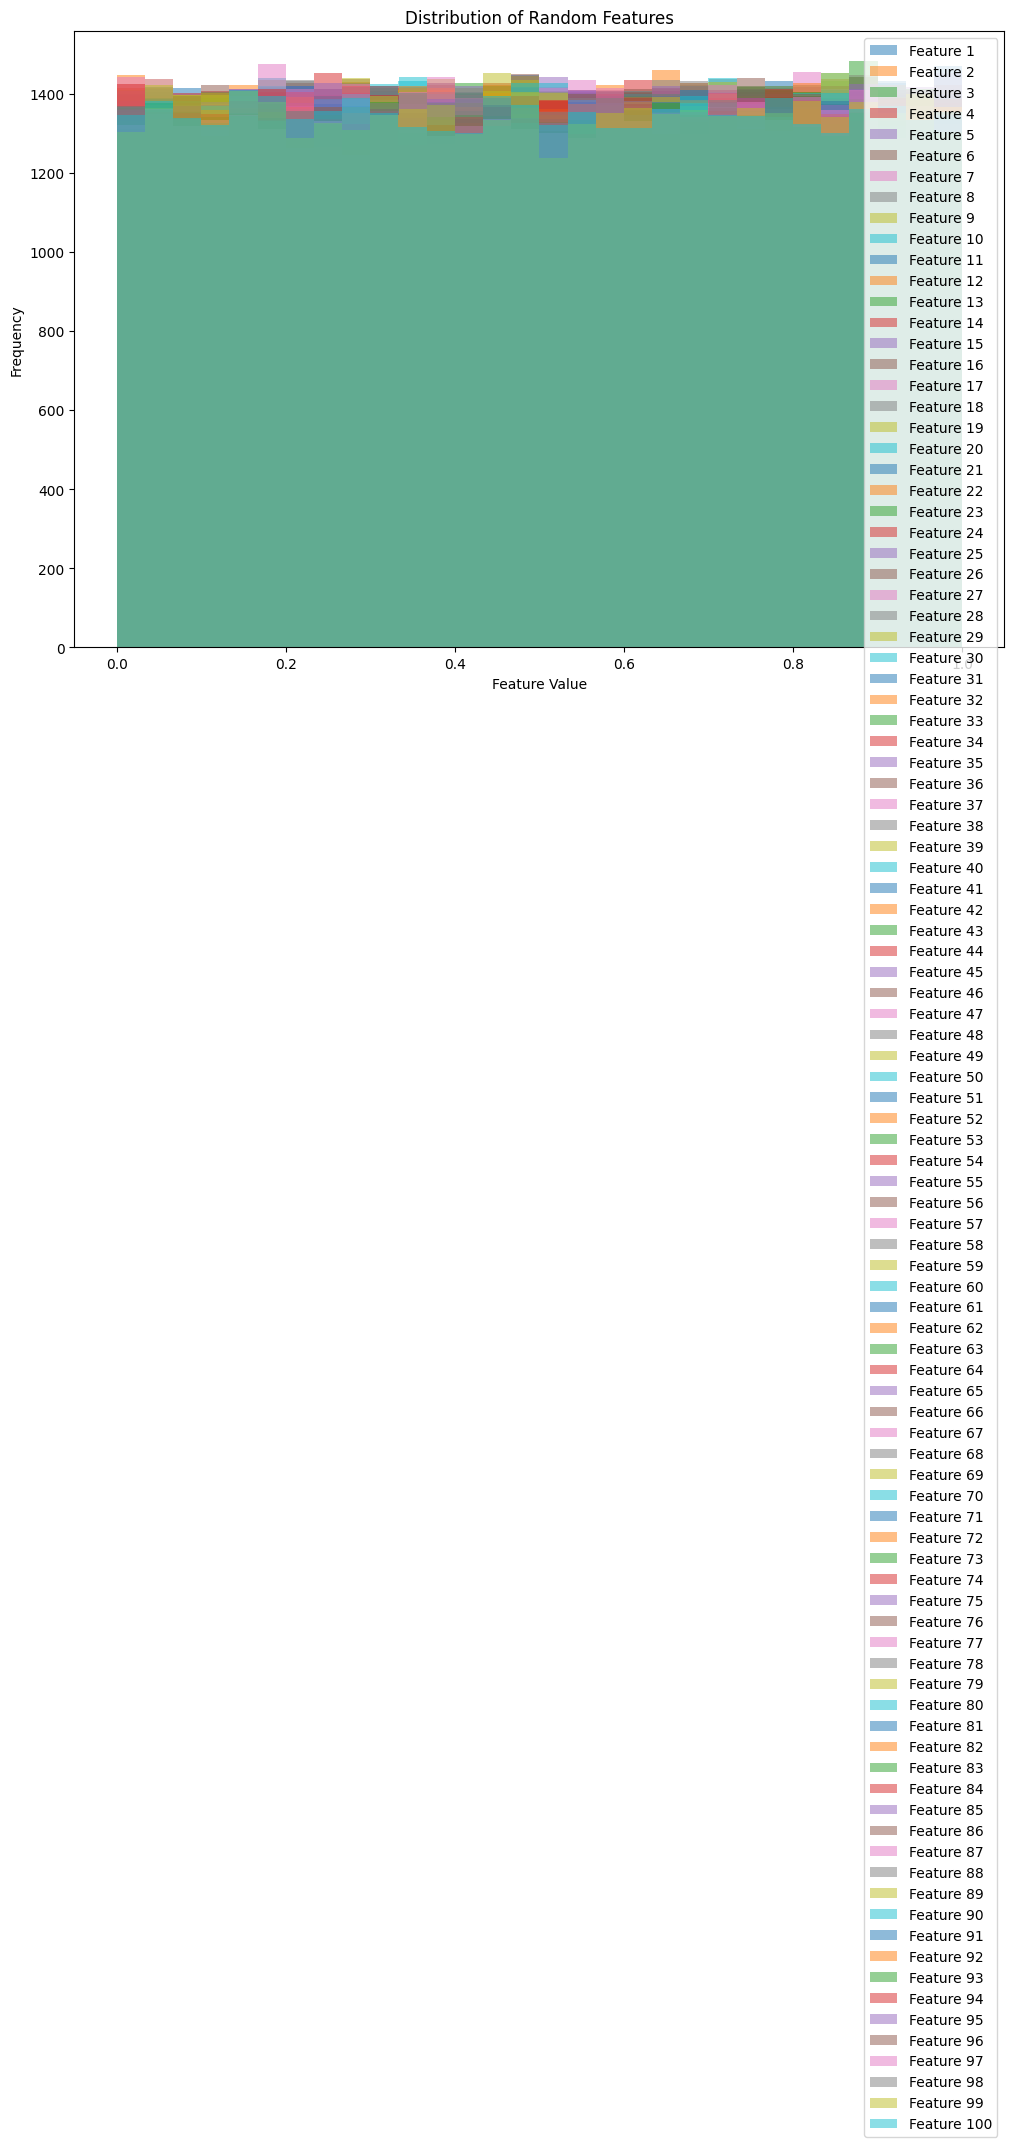

In [56]:
plt.figure(figsize=(12, 8))  # Set figure size
num_features = 100  # Set number of dummy features
X = np.random.rand(len(data), num_features)  # Create dummy features as random numbers

for i in range(num_features):  # Loop through each feature
    plt.hist(X[:, i], bins=30, alpha=0.5, label=f'Feature {i+1}')  # Create histogram for each feature

plt.title('Distribution of Random Features')  # Title of the plot
plt.xlabel('Feature Value')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show legend
plt.savefig('/content/distribution_of_random_features.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

# üìå 9. Preprocess the Tags
- Convert the list of tags into a suitable format for multi-label classification.
- **Why?** Proper formatting of tags is necessary to enable the model to learn from them effectively.

In [57]:
# Preprocess the Tags

In [58]:
data['tags'] = data['tags'].apply(lambda x: x.split())  # Splitting tags into lists for multi-label processing

# üìå 10. Convert Tags to Numerical Representation
- Use `MultiLabelBinarizer` to transform the tags into a binary matrix for model training.
- **Why?** Machine learning models work with numerical data, so converting categorical labels into a binary format is crucial.

In [59]:
# Convert Tags to Numerical Representation

In [60]:
mlb = MultiLabelBinarizer()  # Initialize MultiLabelBinarizer

In [61]:
y = mlb.fit_transform(data['tags'])  # Transform the list of tags into a binary matrix

# üìå 11. Split the Dataset
- Split the dataset into training and validation sets to evaluate model performance effectively.
- **Why?** Having separate training and validation datasets is essential for unbiased evaluation of the model's performance.

In [62]:
# Split the dataset into training and validation sets

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)  # Split dataset into train and validation


# üìå 12. Build the Model
- Create a neural network model using `Sequential` from TensorFlow, adding layers like Dense and Dropout for regularization.
- **Why?** The model architecture is key to capturing the complexity of the classification task, and regularization helps prevent overfitting.

In [64]:
# Build the Model

In [65]:
model = Sequential()  # Initialize a Sequential model

In [66]:
model.add(Dense(128, activation='relu', input_shape=(num_features,)))  # Add input layer with 128 neurons and ReLU activation


In [67]:
model.add(Dropout(0.5))  # Add dropout layer for regularization

In [68]:
model.add(Dense(64, activation='relu'))  # Add hidden layer with 64 neurons and ReLU activation

In [69]:
model.add(Dropout(0.5))  # Add another dropout layer for regularization

In [70]:
model.add(Dense(y.shape[1], activation='sigmoid'))  # Add output layer with sigmoid activation for multi-label classification


# üìå 13. Compile the Model
- Compile the model with appropriate loss functions and optimizers, specifically for multi-label classification.
- **Why?** Compiling the model sets the training configurations, including how to measure performance during training.

In [71]:
# Compile the model

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary crossentropy loss


# üìå 14. Train the Model
- Fit the model to the training data and monitor validation loss to avoid overfitting using the EarlyStopping callback.
- **Why?** Training the model is the core part of machine learning; monitoring validation loss helps ensure the model generalizes well.

In [73]:
# Train the Model

In [74]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Initialize early stopping to monitor validation loss


In [75]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])  # Train the model


Epoch 1/2
1012/1012 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 5ms/step - accuracy: 0.0385 - loss: 0.3344 - val_accuracy: 0.0000e+00 - val_loss: 0.2547
Epoch 2/2
1012/1012 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2665 - val_accuracy: 0.0000e+00 - val_loss: 0.2547


# üìå 15. Evaluate the Model
- Evaluate model performance on the validation set and print out loss and accuracy metrics.
- **Why?** Evaluating the model provides insights into how well it performs on unseen data, which is critical for its practical application.

In [76]:
#  Evaluate the Model

In [77]:
loss, accuracy = model.evaluate(X_valid, y_valid)  # Evaluate the model on the validation set

253/253 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2540


In [85]:
#print('Validation loss:', loss)  # Print validation loss
#print('Validation accuracy:', accuracy)  # Print validation accuracy

# üìå 16. Plot Loss and Validation Loss
- Visualize the training and validation loss over epochs to assess model training.
- **Why?** This plot helps to diagnose training issues and determine if the model is overfitting or underfitting.

In [79]:
#  Plot Loss and Validation Loss

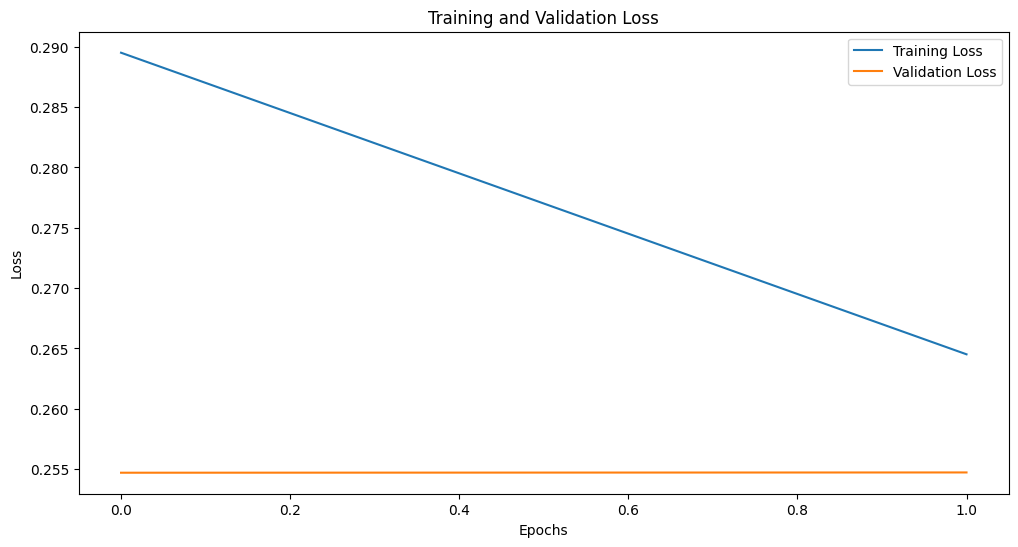

In [80]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Show legend
plt.savefig('/content/training_validation_loss.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

# üìå 17. Model Deployment
- Implement a function to predict land use for a given image name based on the trained model.
- **Why?** This step is essential for utilizing the trained model in real-world applications to make predictions on new data.

In [81]:
# Model Deployment

In [82]:
def predict_land_use(image_name):  # Define a function to predict land use based on image name
    """
    Simulate predicting the land use for a given image name.
    In practice, you'd preprocess the actual image and get its features.
    """
    # Here we're using random features as a placeholder
    dummy_feature = np.random.rand(1, num_features)  # Generate random features for prediction
    prediction = model.predict(dummy_feature)  # Predict using the model
    predicted_tags = mlb.inverse_transform(prediction > 0.5)  # Convert predictions back to tags
    return predicted_tags  # Return predicted tags

In [83]:
# Example prediction

In [84]:
print(predict_land_use('sample_image.jpg'))  # Example of using the prediction function

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step
[('clear', 'primary')]


# üî∂ Conclusion
This project demonstrates the complete workflow of building a machine learning model for multi-label classification tasks, emphasizing data preprocessing, model training, and evaluation. The visualizations provide insights into the data distribution and model performance.

# üî∑ Key Outputs
- **Visualizations:** Various plots saved as PDFs, including:
  - Distribution of Tags
  - Missing Values Heatmap
  - Top 20 Most Frequent Tags
  - Correlation Matrix
  - Distribution of Random Features
  - Training and Validation Loss

- **CSV Files:** Outputs saved for:
  - Missing values
  - Basic statistics of the dataset

# üî∂ References
- TensorFlow documentation for model building and training techniques.
- Pandas documentation for data manipulation and analysis.
- Seaborn and Matplotlib documentation for visualization techniques.